# Pipeline: manual data in schema `experiment`

## Setup notebook appearance 

In [1]:
# make notebook display width scalable
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# make figures bigger
%pylab inline
pylab.rcParams['figure.figsize'] = (9, 7)

Populating the interactive namespace from numpy and matplotlib


## Import manual schemas

In [2]:
from datajoint import ERD
from pipeline import mice, experiment

DataJoint 0.2.8 (July 1, 2016)
Loading local settings from dj_local_conf.json


Here are the dependencies within the `experiment` schema:

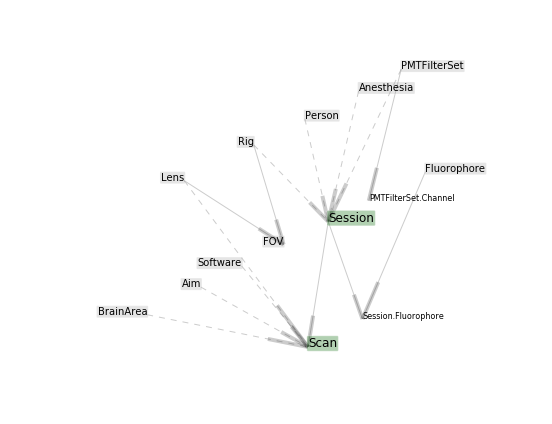

In [3]:
ERD(experiment).draw(prefix=False)

Note that `Session` references `mice.Mice`, so the mouse information must already exist:

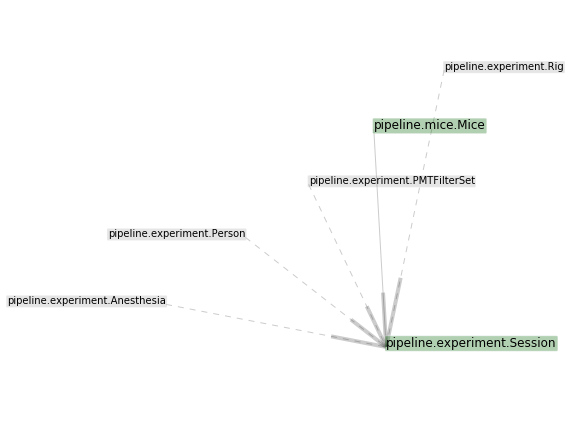

In [4]:
(ERD(experiment.Session)-1).draw()

## Manual tables
During multiphoton imaging experiments, users must enter informaiton into three tables in the `experiment` schema: 
1. `Session`
1. `Session.Fluorophore`
1. `Scan`

Below are previews of contents of these tables:

In [5]:
experiment.Session()

animal_id,session,rig,session_date,username,anesthesia,pmt_filter_set,scan_path,craniotomy_notes,session_notes,session_ts
7588,1,2P3,2016-02-08,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160208,,;;Nestin-GCaMP6s,2016-02-08 15:33:03
7588,2,2P3,2016-02-09,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160209,,;;Nestin-GCaMP6s,2016-02-09 22:31:23
7816,1,2P3,2016-02-10,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160210,,;;Emx1 Cre,2016-02-11 10:51:26
8158,1,2P3,2016-02-14,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160214,,;;Twitch targeted/Emx1,2016-02-14 14:35:58
8341,1,2P3,2016-02-15,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160215,,;;NEstin/GCaMP,2016-02-15 15:08:10
8487,1,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8623,1,2P3,2016-02-17,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160217,,CamKII-tTA/tetO-GCaMP6s;;CamKII-tTA/tetO-GCaMP,2016-02-17 13:05:17


In [6]:
experiment.Session.Fluorophore()

animal_id,session,fluorophore,notes
7588,1,GCaMP6s,
7588,2,GCaMP6s,
7816,1,GCaMP6s,
8158,1,Twitch2B,
8341,1,GCaMP6s,
8487,1,GCaMP6f,
8623,1,GCaMP6s,


For each scan, entries must be filled out in `experiment.Scan`:

In [7]:
experiment.Scan()

animal_id,session,scan_idx,lens,brain_area,laser_wavelength,laser_power,filename,aim,depth,scan_notes,site_number,software,version,scan_ts
7588,1,1,25x,V1,920.0,60.0,m7588A_00001,unset,160,flashing bar,1,scanimage,5.1,2016-02-08 15:35:18
7588,1,4,25x,V1,920.0,60.0,m7588A_00004,unset,160,trippy/monet,4,scanimage,5.1,2016-02-08 16:26:05
7588,2,2,25x,V1,920.0,60.0,m7588A_00002,unset,260,triipy/monet,1,scanimage,5.1,2016-02-09 22:32:18
7816,1,11,25x,V1,920.0,35.0,m7816A_00011,unset,80,,1,scanimage,5.1,2016-02-11 11:22:43
7816,1,20,25x,V1,920.0,37.0,m7816A_00020,unset,102,,2,scanimage,5.1,2016-02-11 11:23:30
7816,1,24,25x,V1,920.0,38.0,m7816A_00024,unset,124,,3,scanimage,5.1,2016-02-11 11:30:51
7816,1,26,25x,V1,920.0,41.0,m7816A_00026,unset,145,,4,scanimage,5.1,2016-02-11 11:34:58


Next: [pipeline_preprocess](pipeline_preprocess.ipynb)

# MATLAB 

In [8]:
%load_ext pymatbridge


/usr/local/lib/python3.5/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-7fbf5127-7b44-4fb6-a263-9a61a878f087
Send 'exit' command to kill the server
........MATLAB started and connected!


In [9]:
%%matlab
run ~/dev/startup.m   % set paths and database credentials

No connections open
mym is now ready for use.


 0:  at-database via TCP/IP           Server version 5.6.30-0ubuntu0.14.04.1-log

g = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [0.94 0.94 0.94]
    Position: [440 378 560 420]
       Units: 'inches'

  Use GET to show all properties



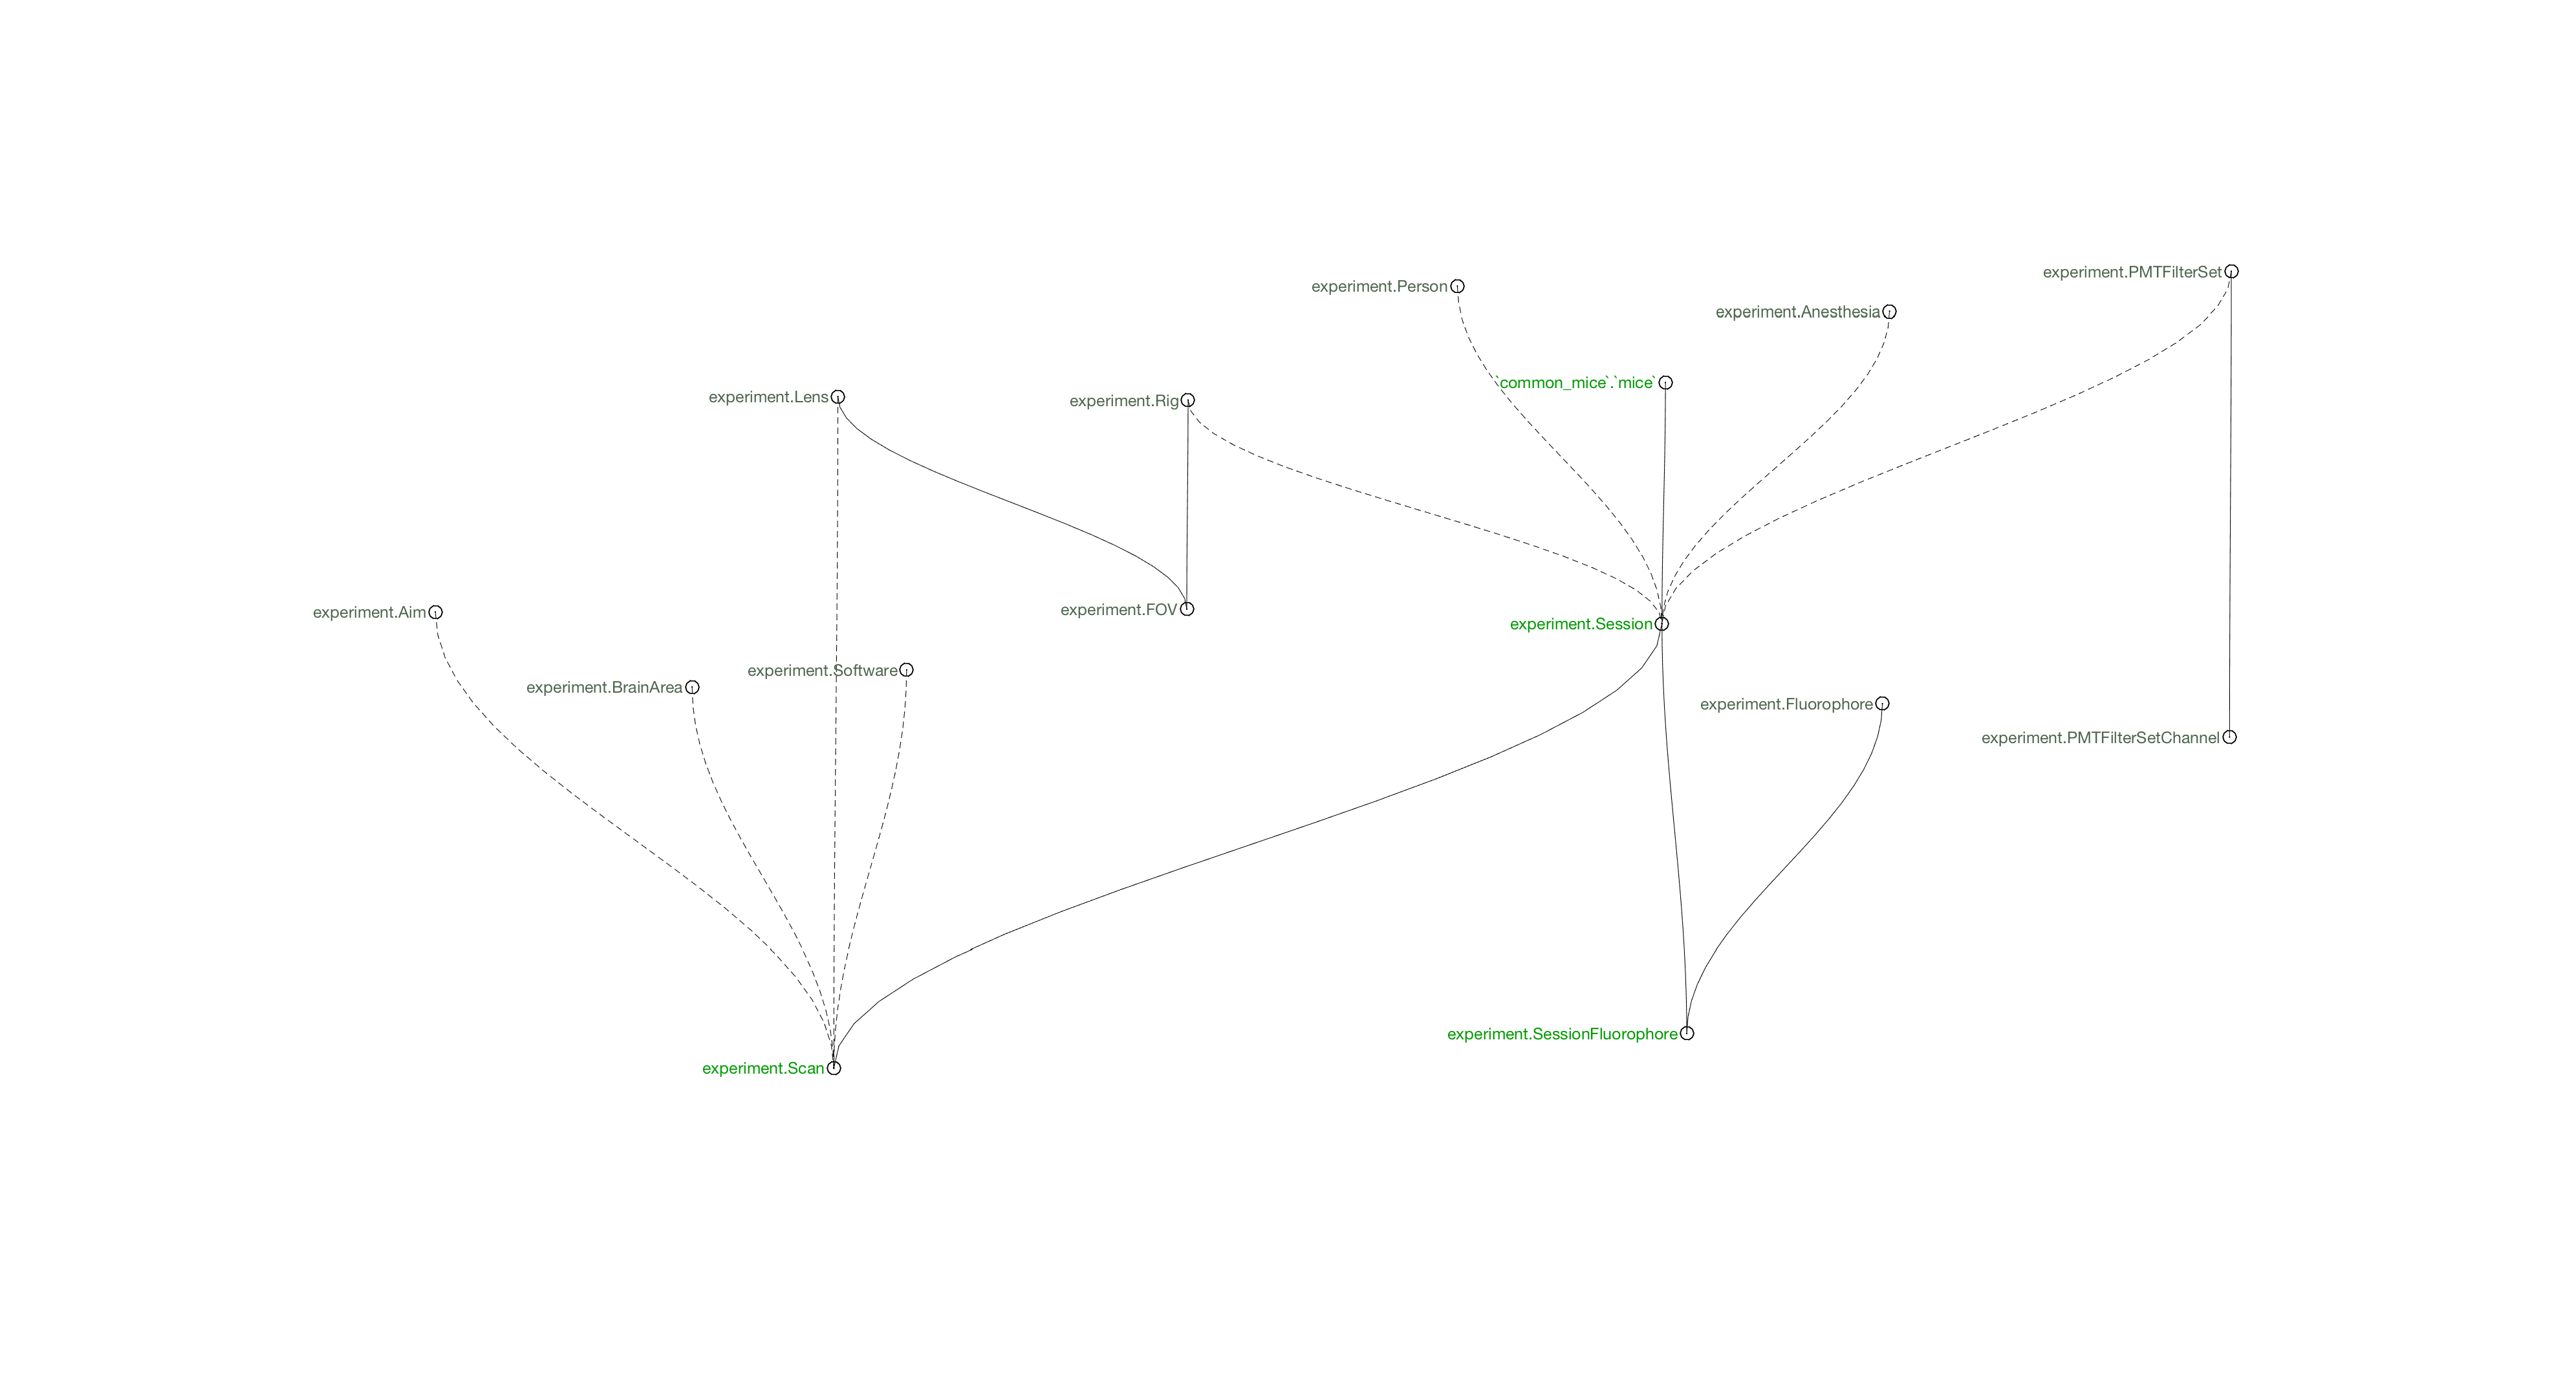

In [10]:
%%matlab
erd experiment  
g = gcf()
set(g, 'PaperSize', [8 6])

In [11]:
%%matlab
x = -5:0.01:5;
plot(x, cos(x))

MatlabInterperterError: Failed to parse and evaluate line 'x = -5:0.01:5;\nplot(x, cos(x))'.
 Matlab error message: 'Images must contain fewer than 2^32 - 1 bytes of data.'